---
# WeatherPy
---

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates[0]

(-0.3804365286669906, 62.01481243646842)

In [5]:
x=coordinates[0]
x[0]

-0.3804365286669906

---
## 6.1.5 Generate Random World Cities
---

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

---
## 6.2.6 Get the City Weather Data
---

#### Import Dependencies, and Initialize an Empty List and Counters

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | cordoba
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | talcahuano
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | voi
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | fairbanks
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | morant bay
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | general pico
Processing Record 17 of Set 1 | predeal
Processing Record 18 of Set 1 | labuan
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | namatanai
Processin

Processing Record 40 of Set 4 | moose factory
Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | albany
Processing Record 43 of Set 4 | laguna
Processing Record 44 of Set 4 | shobara
Processing Record 45 of Set 4 | lisakovsk
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | buncrana
Processing Record 48 of Set 4 | skovde
City not found. Skipping...
Processing Record 49 of Set 4 | almendralejo
Processing Record 50 of Set 4 | mokhsogollokh
Processing Record 1 of Set 5 | san juan
Processing Record 2 of Set 5 | temaraia
City not found. Skipping...
Processing Record 3 of Set 5 | pankovka
Processing Record 4 of Set 5 | erlangen
Processing Record 5 of Set 5 | iranshahr
Processing Record 6 of Set 5 | meulaboh
Processing Record 7 of Set 5 | baraboo
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | verkhnevilyuysk
Processing Record 10 of Set 5 | chokurdakh
Processing Record 11 of Set 5 | wattegama
Processing Record 12 of Set 5 |

Processing Record 30 of Set 8 | jalu
Processing Record 31 of Set 8 | cap malheureux
Processing Record 32 of Set 8 | tatawin
Processing Record 33 of Set 8 | ahipara
Processing Record 34 of Set 8 | ixtapa
Processing Record 35 of Set 8 | dergachi
Processing Record 36 of Set 8 | dafeng
Processing Record 37 of Set 8 | kyra
Processing Record 38 of Set 8 | egvekinot
Processing Record 39 of Set 8 | gat
Processing Record 40 of Set 8 | ginda
Processing Record 41 of Set 8 | aksarka
Processing Record 42 of Set 8 | olinda
Processing Record 43 of Set 8 | parabel
Processing Record 44 of Set 8 | xiaoweizhai
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | luderitz
Processing Record 47 of Set 8 | poum
Processing Record 48 of Set 8 | fare
Processing Record 49 of Set 8 | berezovyy
Processing Record 50 of Set 8 | nieuw amsterdam
Processing Record 1 of Set 9 | mackay
Processing Record 2 of Set 9 | qui nhon
Processing Record 3 of Set 9 | umkomaas
Processing Record 4 of Set 9 | ka

Processing Record 17 of Set 12 | yako
Processing Record 18 of Set 12 | mitsamiouli
Processing Record 19 of Set 12 | batagay-alyta
Processing Record 20 of Set 12 | road town
Processing Record 21 of Set 12 | acarau
Processing Record 22 of Set 12 | ambon
Processing Record 23 of Set 12 | sidi ali
Processing Record 24 of Set 12 | sundsvall
Processing Record 25 of Set 12 | utiroa
City not found. Skipping...
Processing Record 26 of Set 12 | tezu
Processing Record 27 of Set 12 | vanimo
Processing Record 28 of Set 12 | calhoun
Processing Record 29 of Set 12 | biga
Processing Record 30 of Set 12 | mbaiki
Processing Record 31 of Set 12 | pandrup
Processing Record 32 of Set 12 | te anau
Processing Record 33 of Set 12 | kununurra
Processing Record 34 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 35 of Set 12 | yerofey pavlovich
Processing Record 36 of Set 12 | middle island
Processing Record 37 of Set 12 | cartagena
Processing Record 38 of Set 12 | kandrian
Processing Record

In [11]:
len(city_data)

564

In [12]:
city_data[432]

{'City': 'Binzhou',
 'Lat': 37.3667,
 'Lng': 118.0167,
 'Max Temp': 44.06,
 'Humidity': 74,
 'Cloudiness': 100,
 'Wind Speed': 19.86,
 'Country': 'CN',
 'Date': '2021-04-03 01:47:24'}

---
## 6.2.7 Create a DataFrame of City Weather Data
---

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,82.99,65,3,4.00,HK,2021-04-03 01:45:03
1,Faanui,-16.4833,-151.7500,82.17,68,7,1.21,PF,2021-04-03 01:45:03
2,Saldanha,-33.0117,17.9442,60.04,81,100,5.17,ZA,2021-04-03 01:45:03
3,Cordoba,-31.4135,-64.1811,66.99,88,40,3.44,AR,2021-04-03 01:45:04
4,Hermanus,-34.4187,19.2345,60.01,73,100,3.00,ZA,2021-04-03 01:45:04
5,Saint-Pierre,-21.3393,55.4781,75.20,94,75,21.85,RE,2021-04-03 01:45:04
6,Talcahuano,-36.7167,-73.1167,57.20,82,0,12.66,CL,2021-04-03 01:44:20
7,Busselton,-33.6500,115.3333,68.00,74,51,5.01,AU,2021-04-03 01:45:05
8,Voi,-3.3945,38.5630,71.91,85,51,5.01,KE,2021-04-03 01:45:05
9,Tasiilaq,65.6145,-37.6368,30.20,86,75,13.80,GL,2021-04-03 01:45:05


In [14]:
# Reorder columns
new_column_order = ['City','Country','Date','Lat','Lng',
                    'Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2021-04-03 01:45:03,22.2855,114.1577,82.99,65,3,4.00
1,Faanui,PF,2021-04-03 01:45:03,-16.4833,-151.7500,82.17,68,7,1.21
2,Saldanha,ZA,2021-04-03 01:45:03,-33.0117,17.9442,60.04,81,100,5.17
3,Cordoba,AR,2021-04-03 01:45:04,-31.4135,-64.1811,66.99,88,40,3.44
4,Hermanus,ZA,2021-04-03 01:45:04,-34.4187,19.2345,60.01,73,100,3.00
5,Saint-Pierre,RE,2021-04-03 01:45:04,-21.3393,55.4781,75.20,94,75,21.85
6,Talcahuano,CL,2021-04-03 01:44:20,-36.7167,-73.1167,57.20,82,0,12.66
7,Busselton,AU,2021-04-03 01:45:05,-33.6500,115.3333,68.00,74,51,5.01
8,Voi,KE,2021-04-03 01:45:05,-3.3945,38.5630,71.91,85,51,5.01
9,Tasiilaq,GL,2021-04-03 01:45:05,65.6145,-37.6368,30.20,86,75,13.80


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

---
## 6.3.1 Plot Latitude vs. Temperature
---

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

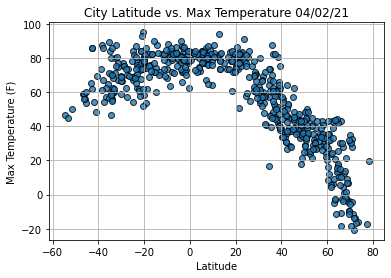

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

---
## 6.3.2 Plot Latitude vs. Humidity
---

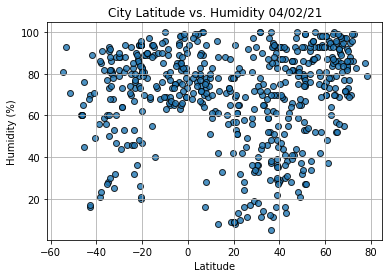

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

---
## 6.3.3 Plot Latitude vs. Cloudiness
---

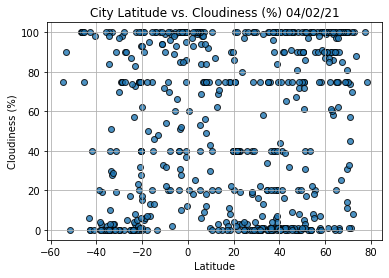

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

---
## 6.3.4 Plot Latitude vs. Wind Speed
---

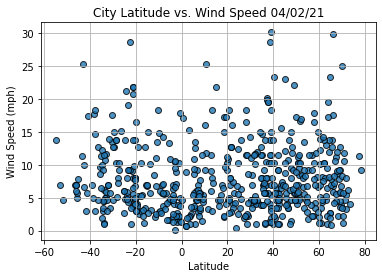

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

---
## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature
---

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2021-04-03 01:45:07
Lat                       -0.7393
Lng                      -90.3518
Max Temp                       77
Humidity                       92
Cloudiness                     86
Wind Speed                   5.01
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2021-04-03 01:45:03,22.2855,114.1577,82.99,65,3,4.00
9,Tasiilaq,GL,2021-04-03 01:45:05,65.6145,-37.6368,30.20,86,75,13.80
10,Fairbanks,US,2021-04-03 01:45:06,64.8378,-147.7164,17.01,57,20,2.62
11,Yellowknife,CA,2021-04-03 01:41:18,62.4560,-114.3525,6.01,78,90,10.36
12,Morant Bay,JM,2021-04-03 01:45:06,17.8815,-76.4093,78.80,73,75,6.91


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

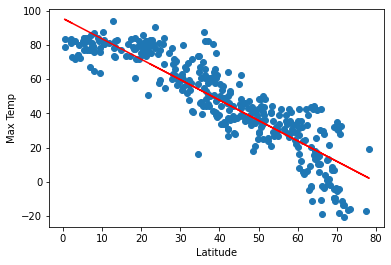

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-30))

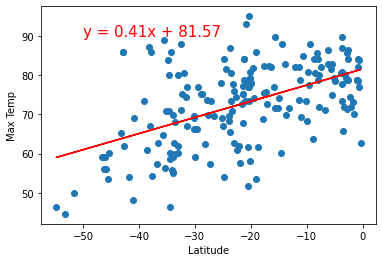

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

---
## 6.4.3 Find the Correlation Between Latitude and Percent Humidity
---

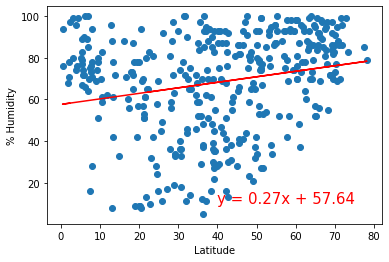

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

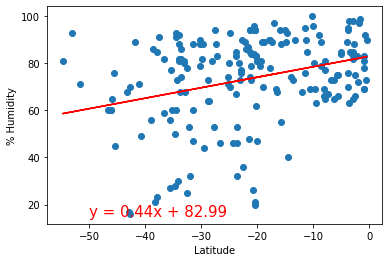

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

---
## 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
---

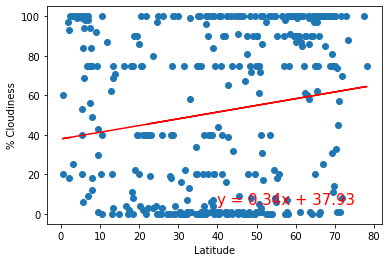

In [30]:
# Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,5))

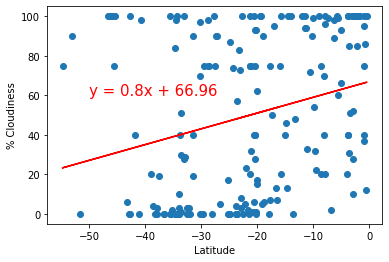

In [31]:
# Linear regression on the Percent Cloudiness for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

---
## 6.4.5 Find the Correlation Between Latitude and Wind Speed
---

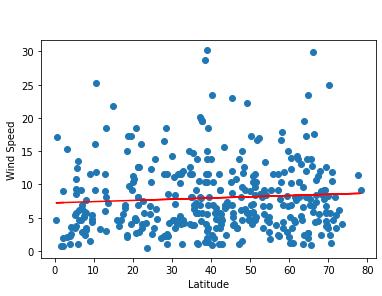

In [32]:
# Linear regression on wind speed for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

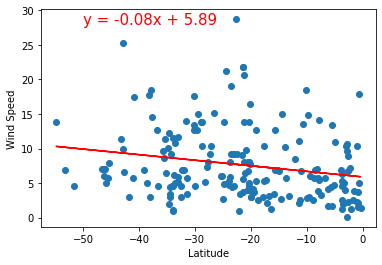

In [33]:
# Linear regression on wind speed for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,28))